# 学習に関するテクニック

## 今ここ
1. 学習
   1. データの前処理
   2. 誤差を求める（損失関数）
   3. 誤差を減らすために勾配の算出
   4. **パラメータの更新**　←　今ここ
2. 推論

## パラメータの更新

### 使うグラフ
↓のような3次元グラフの誤差関数から極小値を求める最適化手法について考えていく

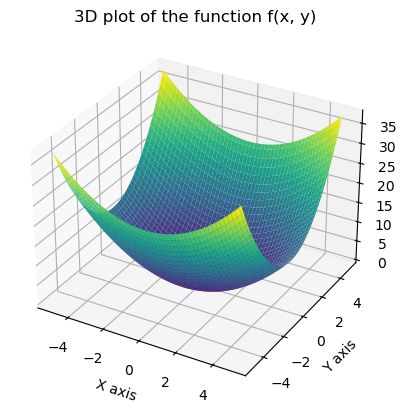

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

# 2変数関数の定義
def f(x, y):
    return x**2 / 2 + y**2

# グリッドの作成
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = f(x, y)

# 3次元グラフの作成
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

# グラフのラベル
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D plot of the function f(x, y)')

plt.show()

### SGD (確率的勾配降下法)


■SGDとは  
学習率$\eta$を勾配に乗算して、学習を進める。  
パラメータを更新する数式は

$$
W = W -  \eta \times \frac{\partial L}{\partial W}
$$

■SGDの欠点  
学習率が一定のため、無駄な学習が多くなる。

↓SGDを実装してみる。

In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

### Momentum

直訳すると運動量・勢い  
勾配を転がるボールのように、速度・勢いがあるような学習ができる。  
↓数式

$$
v = \alpha{v} - \eta\frac{\partial L}{\partial W}
$$

$$
W = W + v
$$

■$\alpha{v}$  
物体が何も力を受けないときに徐々に減速する役割。  
空気抵抗のようなもので、 $\alpha$ は0.9のような値を設定する。  

■Momentum実装

In [4]:
import numpy as np


class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        """
        Args:
            lr (float): 学習率
            momentum (float): 空気抵抗のようなもの
            v (dictionary) : 速度
        """
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        """重みの更新
        Args:
            params (numpy.ndarray): 重み
            grads (numpy.ndarray): 重みの微分値
        """
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]


### AdaGrad
学習率に減衰を加える手法。  
学習はじめは高い学習率で学習をどんどん進ませて、  
学習が進んでいくと、学習率を落とし少しずつ学習率を進ませるようなイメージ。

$$
h = h + \frac{\partial L}{\partial W} \times \frac{\partial L}{\partial W}
$$

$$
W = W - \eta \frac{1}{\sqrt{h}} \frac{\partial L}{\partial W}
$$

ただ、学習を進めれば進めるほど更新量は少なくなり、やがてゼロになります更新されなくなりますが  
この課題を改善した手法として、**RMSProp**というものがある。

In [5]:
class AdaGrad:
    def __init__(self, lr=0.01):
        """初期化
        Args:
            lr (float): 学習率
            h (dictionary) : 学習のスケールを減衰により調整する変数
        """
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        """重みの更新
        Args:
            params (numpy.ndarray): 重み
            grads (numpy.ndarray): 重みの微分値
        """
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr*grads[key] / (np.sqrt(self.h) + 1e-7)

### Adam
MomentumとAdaGradを足したようなやり方

これまでの手法は学習係数にハイパーパラメータ一つを加えていましたが、  
Adamは２つのハイパーパラメータを加えて表します。(計３つ)  

### MNISTデータセットによる更新手法の比較

===========iteration:0===========
SGD:2.3840266162641135
Momentum:2.487331070027235
AdaGrad:2.1431117090253
Adam:2.207623334481969
===========iteration:100===========
SGD:1.6037047993376832
Momentum:0.2618894676525332
AdaGrad:0.12907111545341282
Adam:0.21161424061719036
===========iteration:200===========
SGD:0.7759419560871746
Momentum:0.2518149876027107
AdaGrad:0.1575796775703979
Adam:0.3097026853872183
===========iteration:300===========
SGD:0.5216008266110878
Momentum:0.2200707371498951
AdaGrad:0.12438255422306305
Adam:0.13789211901542436
===========iteration:400===========
SGD:0.36151196840098043
Momentum:0.1715092137934912
AdaGrad:0.05626414313884398
Adam:0.11345873725824399
===========iteration:500===========
SGD:0.3858128963856078
Momentum:0.14321155520293039
AdaGrad:0.08780727737924453
Adam:0.07723589418160512
===========iteration:600===========
SGD:0.30601724914086803
Momentum:0.13662496849679656
AdaGrad:0.05651683242470883
Adam:0.06369007382461772
===========iteration:700===

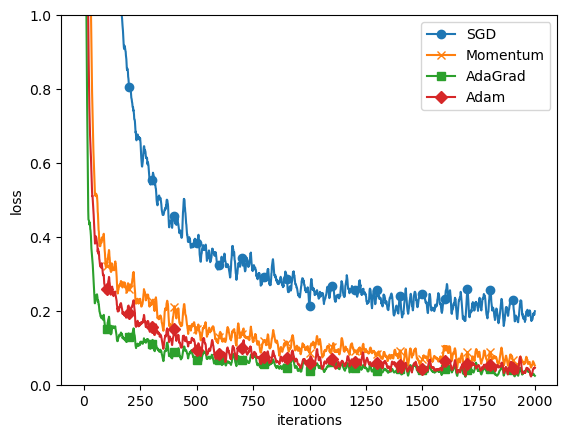

In [ ]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

# 1:実験の設定==========
optimizers = {
    'SGD': SGD(),
    'Momentum': Momentum(),
    'AdaGrad': AdaGrad(),
    'Adam': Adam()
    # 'RMSprop': RMSprop()
}

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10
    )
    train_loss[key] = []

# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

# 3.グラフの描画==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()


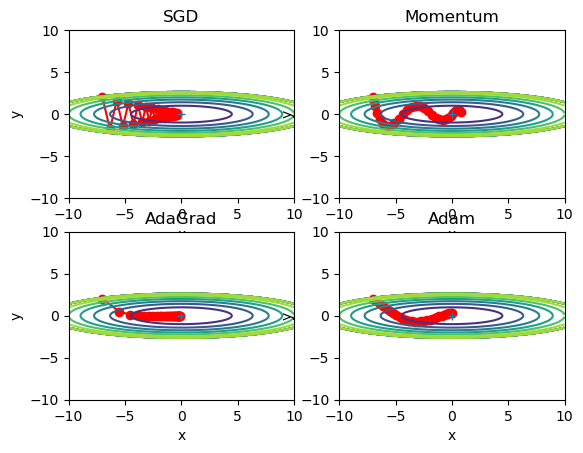

In [7]:
# coding: utf-8
import sys
import os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0 * y


def plot_contour(optimizer_name, x_history, y_history, idx):
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    # for simple contour line
    mask = Z > 7
    Z[mask] = 0

    # plot
    plt.subplot(2, 2, idx)
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    plt.title(optimizer_name)
    plt.xlabel("x")
    plt.ylabel("y")


def main():
    init_pos = (-7.0, 2.0)
    params = {'x': init_pos[0], 'y': init_pos[1]}
    grads = {'x': 0, 'y': 0}

    optimizers = OrderedDict()
    optimizers["SGD"] = SGD(lr=0.95)
    optimizers["Momentum"] = Momentum(lr=0.1)
    optimizers["AdaGrad"] = AdaGrad(lr=1.5)
    optimizers["Adam"] = Adam(lr=0.3)

    for idx, (key, optimizer) in enumerate(optimizers.items(), start=1):
        x_history = []
        y_history = []
        params['x'], params['y'] = init_pos[0], init_pos[1]

        for _ in range(30):
            x_history.append(params['x'])
            y_history.append(params['y'])

            grads['x'], grads['y'] = df(params['x'], params['y'])
            optimizer.update(params, grads)

        plot_contour(key, x_history, y_history, idx)

    plt.show()


if __name__ == "__main__":
    main()

### 重みの初期値の考え方
■Weight decay(荷重減衰)  
過学習を抑え、汎化性能を高めるテクニック。  
重みの値を小さくすると過学習が起きにくくする。  

■重みの初期値をゼロに  
重みを小さくすれば過学習が起きにくいならいっそのことゼロにするのはどうか。  
重みをゼロにしてしまうと正しい学習ができない。  
なぜなら、誤差逆伝播法で積の逆伝播を行うときに、

### 隠れ層のアクティベーション

## バッチの正則化


## 第２回


## Dropout

## ハイパーパラメータの検証
■検証方法
ハイパーパラメータをランダムに決めて→検証→評価のサイクルを繰り返し、よかったパラメータを採用する

### ベイズ最適化
入力データ＋カーネル関数　＝　カーネル行列  
損失関数を予測する

質問
ベイズ最適化は、パラメータ  
答えがここにあるという